# Introduksjon til SciPy biblioteket 

$\textbf{Læringsmål:}$ Lære å sette seg inn i bibliotek og dokumentasjon. Grunnleggende introduksjon til SciPy og spesielt scipy.integrate.solve_ivp funksjonen. 


-----------------------------------------

SciPy er et bibliotek for Python, som benyttes til vitenskapelige beregninger. Biblioteket er laget for å fungere med NumPy arrays (som du har lært om i Mekanisk Fysikk). SciPy inneholder pakker for blant annet numerisk integrasjon, optimalisering og interpolasjon. Dokumentasjon finnes på https://docs.scipy.org/doc/scipy/reference/.

Dersom du har lastet ned Anaconda, slik som er beskrevet på denne siden, har du allerede SciPy biblioteket, og du trenger ikke laste ned noe ekstra.(?)

`scipy.integrate` pakken inneholder funksjoner for numerisk integrasjon, samt funksjoner for løsning av ordinære differensialligninger. Et eksempel på en funksjon som finnes i denne pakken er `scipy.integrate.quad(func, a, b)`, som numerisk beregner et bestemt integral. Funksjonen tar inn en funksjon (func) som første element, og startverdi(a) som andre og sluttverdi(b) som tredje element. Funksjonen returnerer en tupel med to verdier. Første verdi er verdien av det beregnede integralet, og andre verdi er et estimat av den absolute feilen i det beregnede integralet. 

Vi bruker integrate pakken og quad funksjonen som eksempler under.

For å importere en pakke fra SciPy biblioteket skriver du (øverst i dokumentet)

In [4]:
import scipy as integrate

Et enkelt eksempel på bruk av `integrate.quad` funksjonen:

In [24]:
def f(x):
    """
    Enkel funksjon som returnerer verdien av x^2
    """
    return x**2

a = 1 # Start
b = 2 # Slutt

val = integrate.quad(f,a,b) # Kaller på funksjonen og lagrer tupelen som returneres i en variabel

integral_value = val[0]     # Lagrer verdien av det beregnede integralet i en variabel
print("Beregnet verdi av integralet til x^2 fra 1 til 2:", integral_value)

Beregnet verdi av integralet til x^2 fra 1 til 2: 2.3333333333333335


Merk at vi kaller funksjonen med `integrate.quad`.

### Dokumentasjon
--------------------

I dokumentasjonen til SciPy står det hva som er parametre i en funksjon, og hva den returnerer. Det er også vanligvis eksempler med bruk av funksjonen, og er gjerne lurt å forstå før en selv skal prøve å bruke den. Ofte står det mange parametre, men mange har $\textit{default}$ verdier. Dvs. at vi kan la være å endre på disse verdiene (man sier at de er "optional"). Det kan også være nødvendig å endre på disse verdiene, og det er da nyttig å lese dokumentasjon på nettsidene til SciPy. 

$\textit{For eksempel:}$ `scipy.integrate.trapz(y, x=None, dx=1.0, axis=-1)`
         
Den eneste parameteren vi må gi til funksjonen er y, mens de andre har default verdi.

Det finnes $\textit{mange}$ funksjoner i SciPy biblioteket, så det er derfor nødvendig å klare å sette seg inn i dokumentasjonen når man finner en funksjon man ønsker å benytte. Vi bruker `scipy.integrate.trapz` sin dokumentsjon, som finnes på https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html for å forklare hvordan man bruker det. 




### Løsning av ordinære differensialligninger med SciPy

---------------

Vi skal nå se på `scipy.integrate.solve_ivp` funksjonen, som brukes for å løse ordinære differensialligninger. Dokumentasjonen finnes på https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html.
Som forklart her $\textit{krever}$ funksjonen at det tas inn (minst) tre variable;

`scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=t)`

$\textbf{fun:}$ callable

fun er en funksjon som returnerer et objekt av typen array_like, som er høyre side av differensialligningen. Må være på formen fun(t,y) hvor t er en float (skalar), og y kan være en array (dersom vi har et ligningssystem) eller en float dersom vi kun har én ligning.

$\textbf{t_span:}$ 2-tuple of floats 

t_span er integrasjonsintervallet (t0, t1) (tiden det integreres over). 
Tuple med to floats som elementer (kan også bruke liste her).

$\textbf{y0:}$ array_like, shape(n,)

y0 er en array med starttilstander, med lengde lik antall ligninger i ligningssystemet 

$\textbf{method:}$ 


Under finner du et eksempel på bruk av scipy.integrate.solve_ivp for en førsteordens ODE gitt ved $\frac{dy}{dt} = -0.5 y$, med $y_0$ = 4 (initialverdi).

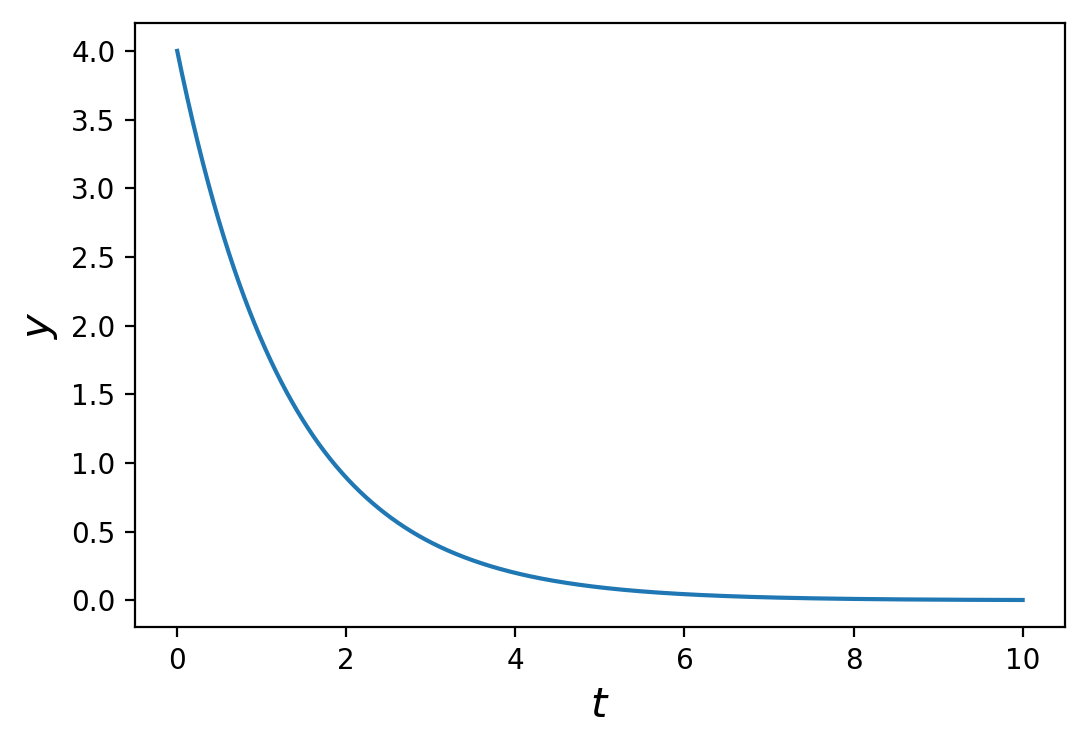

In [25]:
from scipy import integrate     # Importerer integrate pakken
import numpy as np              # Importerer numpy, som np
import matplotlib.pyplot as plt # For å plotte
import matplotlib as mpl
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 200 # Setter dpi til figuren til 200 (bedre kvalitet)


def equation(t, y):
    # t: float, tid
    # x: array, x-verdier
    dy = -0.75*y
    return dy

# Initialverdi

y_0 = 4    # Initialverdi for x

# Parametre

t_0 = 0      # Starttid (s)
t_1 = 10     # Sluttid (s)
dt = 0.001   # Tidssteg (s)

def RK45_method(RHS, y_0, t_1, dt):
    # Regner ut x-verdier
    # RHS: Høyre side av differensialligningen
    # t_1: Sluttid
    # dt: tidssteg
    init_values = [y_0]  # Funksjonen tar inn en list eller numpy array som variabel
                                   # må derfor ha som array selv om det kun er en verdi her.
    t_span = [0, t_1+dt]           # Liste med start og sluttverdi
    t = np.arange(0, t_1 + dt, dt) # Array med verdier fra 0 til t_1, med dt som steglengde mellom verdier
    solution = integrate.solve_ivp(RHS, t_span, init_values, method = 'RK45', t_eval = t) 
    # Setter at method = 'RK45', men dette er standard så må ikke ha med
    x = solution.y[0, :] # Array med x-verdier
    t = solution.t       # Array med t-verdier
    return x, t

y, t = RK45_method(equation, y_0, t_1, dt)

plt.plot(t, y)                   # Plotter y-verdiene som funksjon av tid. 
plt.xlabel('$t$', fontsize = 15) # Setter navn på x-aksen, og setter skriftstørrelsen på aksen til 15
plt.ylabel('$y$', fontsize = 15) # Setter navn på y-aksen, og setter skriftstørrelsen på aksen til 15
plt.show()                       # Viser plotte 